In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

%matplotlib inline

# load data
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['label'] = iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [3]:
df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']
df.label.value_counts()

label
0    50
1    50
2    50
Name: count, dtype: int64

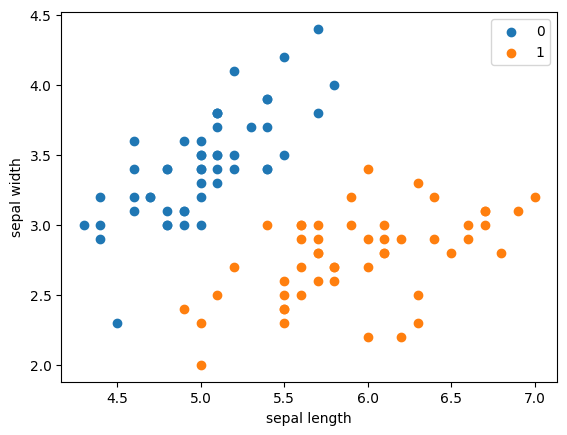

In [4]:
plt.scatter(df[:50]['sepal length'], df[:50]['sepal width'], label='0')
plt.scatter(df[50:100]['sepal length'], df[50:100]['sepal width'], label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

In [12]:
data = np.array(df.iloc[:100, [0,1,-1]])
X_t, y_t = data[:,:-1], data[:,-1]
y_t = np.array([1 if i==1 else -1 for i in y_t])

In [13]:
class Model:
    def __init__(self):
        self.w = np.zeros(len(data[0]) - 1, dtype=np.float32)
        self.b = 0
        self.l_rate = 0.15

    def sign(self, x, w, b):
        y = np.dot(x, w) + b
        return 1 if y >= 0 else -1

    def fit(self, X_train, y_train):
        is_wrong = False
        train_num = 0
        while not is_wrong:
            train_num += 1
            wrong_count = 0
            for d in range(len(X_train)):
                X = X_train[d]
                y = y_train[d]
                if y * self.sign(X, self.w, self.b) <= 0:
                    self.w = self.w + self.l_rate * np.dot(y, X)
                    self.b = self.b + self.l_rate * y
                    wrong_count +=1
            if wrong_count == 0:
                is_wrong = True
        print(f"w: {self.w}, b:{self.b}")
        return f"训练完成，迭代 {train_num} 次"

    def score(self):
        pass

perceptron = Model()
perceptron.fit(X_t, y_t)

w: [ 11.85  -15.105], b:-18.6


'训练完成，迭代 701 次'

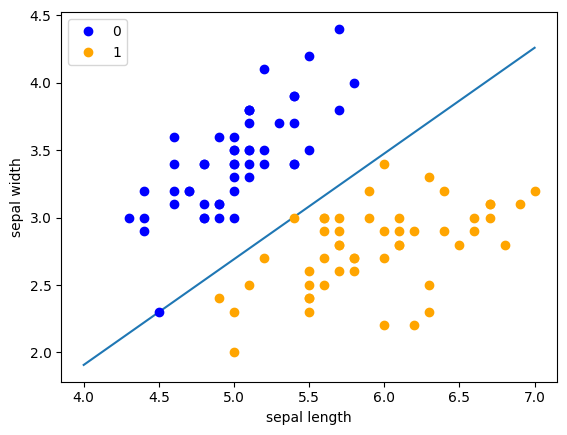

In [14]:
x_points = np.linspace(4, 7, 10)
x1 = -(perceptron.w[0] * x_points + perceptron.b) / perceptron.w[1]
plt.plot(x_points, x1)

plt.plot(data[:50, 0], data[:50, 1], 'o', color='blue', label='0')
plt.plot(data[50:100, 0], data[50:100, 1], 'o', color='orange', label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

In [9]:
from sklearn.linear_model import Perceptron
clf = Perceptron()
clf.fit(X_t, y_t)

Perceptron()

In [10]:
clf.coef_, clf.intercept_

(array([[ 23.2, -38.7]]), array([-5.]))

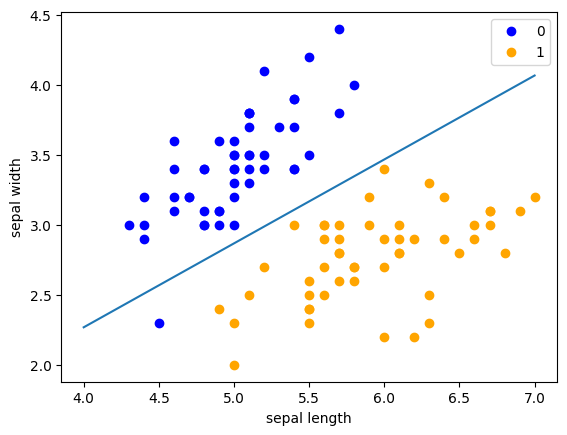

In [11]:
x_points = np.linspace(4, 7, 10)
x1 = -(clf.coef_[0][0] * x_points + clf.intercept_[0]) /clf.coef_[0][1]
plt.plot(x_points, x1)

plt.plot(data[:50, 0], data[:50, 1], 'o', color='blue', label='0')
plt.plot(data[50:100, 0], data[50:100, 1], 'o', color='orange', label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()